# Homework No. 3

The following jupyter notebook contains the results of the third homework for the course: "Data Visualization" and was created by Franz Just.

To execute the jupyter notebook, the following libraries are required to install:
- pandas
- seaborn
- matplotlib
- numpy
- plotly

The dataset that is used was published by **Jack Daoud** on **Kaggle** and can be found through the following **URL:** https://www.kaggle.com/jackdaoud/marketing-data.

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import calendar
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("dataset.csv", index_col = None)
df = df.drop(columns=['Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])
df = df.rename(columns={" Income ": "Income"})
df2 = pd.melt(df[["NumCatalogPurchases","NumWebPurchases", "NumStorePurchases"]])

## 1. Visualization - Violin plot

The first visualization is a violin plot, which compares the purchases accross the different sale channels.

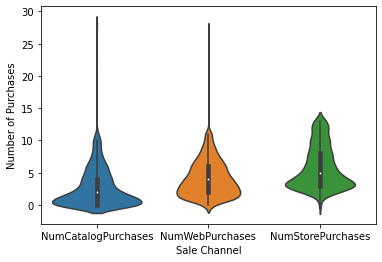

In [4]:
ax = sns.violinplot(x=df2.variable, y=df2.value)
plt.xlabel("Sale Channel")
plt.ylabel("Number of Purchases");

## 2. Visualization - Donut chart

The second visualization is a donut plot and compares the average purchases per sale channel in percent. The average of the total purchases can be seen in the middle of the plot.

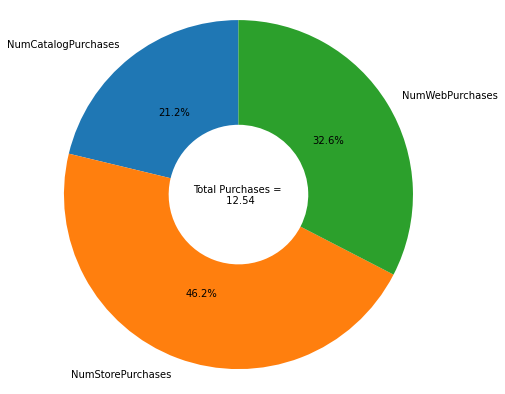

In [5]:
meanNumWebPurchases = np.mean(df.NumWebPurchases);
meanNumCatalogPurchases = np.mean(df.NumCatalogPurchases);
meanNumStorePurchases = np.mean(df.NumStorePurchases);
sumPurchases = meanNumWebPurchases + meanNumCatalogPurchases + meanNumStorePurchases

labels = ["NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases"]
values = [(meanNumCatalogPurchases * 100)/sumPurchases, (meanNumStorePurchases * 100)/sumPurchases, (meanNumWebPurchases * 100)/sumPurchases]

fig1, ax1 = plt.subplots(figsize=(7,7));
ax1.pie(values, wedgeprops=dict(width=0.6),labels = labels, autopct= '%.1f%%', startangle=90);
sumstr = 'Total Purchases = \n '+ str("%.2f" % sumPurchases);
ax1.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center');
ax1.axis('equal');
plt.show()

## 3. Visualization

The third visualization is a radar chart and gives an overview about the customer registrations per month in the year 2013. 

In [6]:
df["Date"] = pd.to_datetime(df['Dt_Customer']);
df3 = df[(df['Date'] >= "2013-01-01") & (df['Date'] <= "2013-12-31")]
df3.index = pd.to_datetime(df3['Date'],format='%m/%d/%y %I:%M%p');
dt = df3.groupby(by=[df3.index.month]).size();
dt = dt.to_frame().reset_index();
dt = dt.rename(columns={0: "count"});
dec = list(dt["count"]);
months = list(calendar.month_name);
months.pop(0);

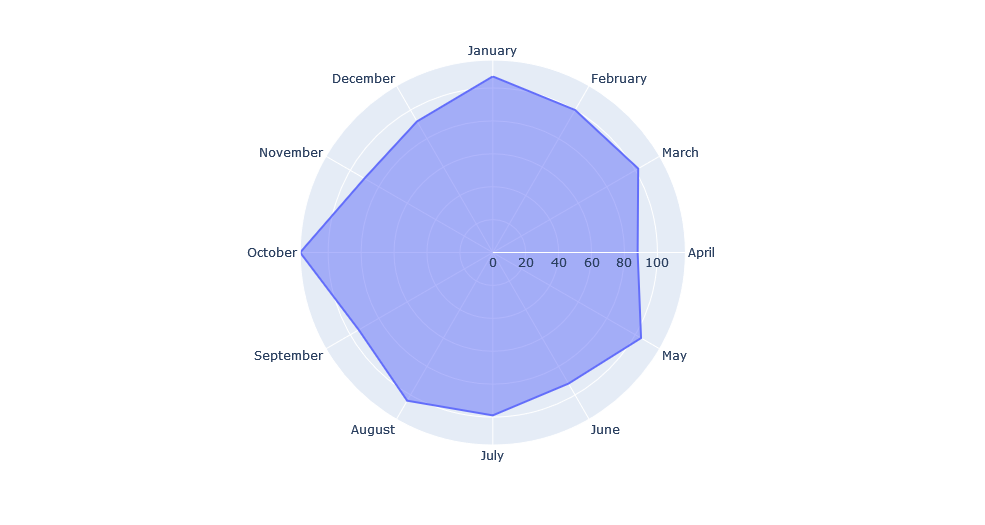

In [7]:
fig = px.line_polar(df, r= dec, theta= months, line_close=True)
fig.update_traces(fill='toself')
fig.show()

## 4. Visualization - Box plot

For the fourth visualization, 3 boxplots were created which give closer insights about the data of the corresponding sale channels. 

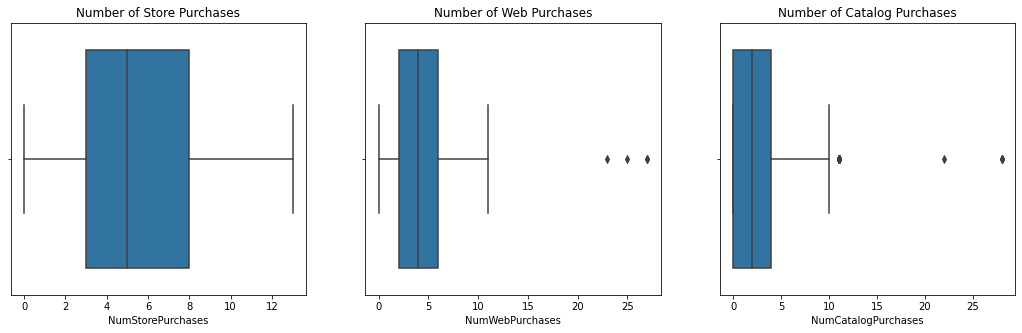

In [8]:
plt.figure(figsize=(18,5))
plt.subplot(1,3, 1)
plt.title("Number of Store Purchases")
sns.boxplot(x=df["NumStorePurchases"])
plt.subplot(1,3,2)
plt.title("Number of Web Purchases")
sns.boxplot(x=df["NumWebPurchases"])
plt.subplot(1,3,3)
plt.title("Number of Catalog Purchases")
sns.boxplot(x=df["NumCatalogPurchases"]);

## Source

[1] Jack Daoud; Marketing Analytics; https://www.kaggle.com/jackdaoud/marketing-data

-----------------------------------------------------------
Author: Franz Just